In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import inspect
import datetime
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf

In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
import time 
from statsmodels.graphics.tsaplots import acf
from scipy.signal import periodogram
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime
from scipy.interpolate import interp1d
from IPython.display import clear_output
pd.set_option('display.max_row', 1000)

In [2]:
import Lyapunov_funcs as ly

In [64]:
pd.set_option('mode.chained_assignment', None)

# Generate test data
## Define logistic function

In [3]:
# define function
def logistic_fn(mu,xi):
    return mu*xi * (1-xi)


# compute function
def compute_fn (mu,x0 = 1e-99, length = 500):
    
    function = []

    for i in range(0,length): # generate array with index 0 -> 99
        if i == 0:
            function.append(x0)
        else:
            previous_value = function[i - 1]
            function.append(logistic_fn(mu,previous_value))
            
    return function

## Calculate mean period of time series 

$$\mu = 1/T $$

Where T is the mean period of the time series' power spectrum

In [36]:
def calc_mean_period (timeseries):
    power_spectrum = periodogram(timeseries)[1]
    frequencies = periodogram(timeseries)[0]
    
    weights = power_spectrum / sum(power_spectrum)
    return 1/np.average(frequencies, weights = weights)

# Compute lag

In [38]:
def compute_lag(data, plot = False):

    autocorr = acf(data, fft = True, nlags = 500)

    if (plot):
        plt.plot(autocorr)
        plt.axhline(1 - 1/np.e, linestyle = "--", c = 'k', label = '1-1/e')
        plt.legend(loc = 'best')
        
    i = 0
        
    while (autocorr[i] > (1-1/np.e)):
        lag = autocorr[i]
        i += 1
        
    if (plot):
        plt.axvline(i)

    return i

## Put data into phase space

Each row represents a different value for i

Each column is a different j value 

Total length of each column is M

Total width of matrix is m (embedding dimension)

Each column seperated by lag J 

First value of each row represents the original time series

In [49]:
def gen_phase_space_matrix(timeseries, J, m):
    
    
    matrix = pd.DataFrame(columns = np.arange(0,m))
        
    for i, val in enumerate(timeseries):
        
        x_i = []

        for it in range(0, m):
            
            try:
                i_plus_j = timeseries[i + J*it]
                x_i.append(i_plus_j)
            except:
                x_i.append(np.nan)
                
        
        matrix.loc[i] = x_i
    return matrix

## Find initial distance to nearest neighbour

1. For first row (i = 0), search for the nearest neighbour - entry with the smallest Euclidian distance to the row (i.e. pass both rows of matrix as m-dimensional points to euclidian function). This is distance dj(0)

2. Calculate the distance between these points for the following rows to get dj(i). Resulting matrix of distances will be M rows long.

In [39]:
def euc_distance (p1, p2):
    
    try: 
        return distance.euclidean (p1,p2)
    except:
        return np.inf

def find_nearest_neighbour (dataframe, ref_index, mean_period, i_max = 25,print_error = False):
    
    start = datetime.datetime.now()
    
    dists = []
    ref_row = dataframe.iloc[ref_index, :].values

    min_dist = np.inf 
    min_index = np.nan

    for i in range(0,dataframe.shape[0] - i_max):

        test_row = dataframe.iloc[i, :].values

        if i != ref_index and abs(i-ref_index) > mean_period and euc_distance(ref_row, test_row) > 0:

            dist = euc_distance(ref_row, test_row)

            if dist  < min_dist:
                min_dist = dist
                min_index = i


    if min_dist == np.inf and print_error:
            print('Nearest neighbour not found for index ', ref_index)
            
    end = datetime.datetime.now()
        
    return min_index

In [30]:
NN_pairs = []

for i in range(0,test_matrix.shape[0]):
    NN = find_nearest_neighbour(test_matrix, ref_index= i, mean_period = mean_period)
    NN_pairs.append([i,NN])

In [31]:
NN_pairs

[[0, 306],
 [1, 307],
 [2, 308],
 [3, 309],
 [4, 310],
 [5, 311],
 [6, 312],
 [7, 313],
 [8, 418],
 [9, 419],
 [10, 360],
 [11, 361],
 [12, 189],
 [13, 190],
 [14, 191],
 [15, 448],
 [16, 449],
 [17, 450],
 [18, 451],
 [19, 452],
 [20, 282],
 [21, 283],
 [22, 284],
 [23, 285],
 [24, 286],
 [25, 287],
 [26, 288],
 [27, 289],
 [28, 290],
 [29, 434],
 [30, 59],
 [31, 356],
 [32, 68],
 [33, 69],
 [34, 70],
 [35, 71],
 [36, 396],
 [37, 397],
 [38, 276],
 [39, 277],
 [40, 183],
 [41, 184],
 [42, 185],
 [43, 93],
 [44, 94],
 [45, 95],
 [46, 161],
 [47, 297],
 [48, 298],
 [49, 469],
 [50, 146],
 [51, 438],
 [52, 194],
 [53, 195],
 [54, 196],
 [55, 197],
 [56, 198],
 [57, 199],
 [58, 200],
 [59, 30],
 [60, 31],
 [61, 286],
 [62, 287],
 [63, 425],
 [64, 426],
 [65, 283],
 [66, 154],
 [67, 155],
 [68, 32],
 [69, 33],
 [70, 34],
 [71, 420],
 [72, 421],
 [73, 422],
 [74, 192],
 [75, 193],
 [76, 26],
 [77, 27],
 [78, 410],
 [79, 258],
 [80, 220],
 [81, 266],
 [82, 330],
 [83, 331],
 [84, 440],
 [85,

In [34]:
test_matrix.iloc[0,:]

0    0.10
1    0.36
Name: 0, dtype: float64

In [36]:
test_matrix.iloc[305,:]

0    0.974343
1    0.099994
Name: 305, dtype: float64

## Calculate divergence of nearest neighbours

In [40]:
def compute_divergence(dataframe, NN_pairs, i_max = 25): 
    
    dj_data = []
    
    for i in range (0,i_max): # calculate divergence through i_max steps
        
        dj_i = []
    
        for k in range (0,(dataframe.shape[0] - i_max)): # compute for all nearest neighbour pairs 
            
            if (np.nan not in NN_pairs[k]):
                NN_1 = NN_pairs[k][0]
                NN_2 = NN_pairs[k][1]

                p1 = dataframe.iloc[NN_1 + i, :] #go to matrix and find row #NN_1 + i
                p2 = dataframe.iloc[NN_2 + i, :]

                if euc_distance(p1,p2) > 0: 
                    dj_i.append(euc_distance(p1,p2))
                
        
        dj_data.append([i,np.mean(np.log(dj_i))])
        

    return dj_data

In [17]:
lyaponov_data = pd.DataFrame(expected_log_distance(test_matrix, NN_pairs), columns = ['i','log(dj)'])

## Get Lyapunov exponent by linear fit

Lyapunov exponent $\lambda _{1}$ can be found from the following equation

$$ ln(d_{j}(i)) = \lambda _{1}i\Delta t + ln(d_{j}(0)) $$

In [41]:
def forward_difference_approximation(x, y):
    
    diff_funct = []
    
    for it in range(0, len(x) - 1):
        
        y1_y0 = y[it+1] - y[it] 
        x1_x0 = x[it+1] - x[it] 
        
        diff_funct.append(y1_y0/x1_x0)
    
    return  pd.DataFrame(diff_funct,x[0:len(x) -1], columns = ['y'])


In [42]:
def score_linearity(start, end, divergence, divergence_prime, a = 0.1, b = 5):
    region = divergence.loc[start + 0.1:end]
    region_grad = divergence_prime[start + 0.1: end]
    
    N = region.shape[0]
    mean_grad = region_grad['y'].mean()
        
    return (N*a) + (mean_grad*b) , N*a, mean_grad*b

In [56]:
def fit_linear_region(divergence,plot_fit = False, plot_derivatives = False, print_linearity_scores = False, i_max = 25):

    delta_t = 1 
    # Add interpolation points
    f = interp1d(divergence['i'], divergence['log(dj)'])
    i_new = np.arange(0,max(divergence['i']),0.1)
    div_interpolated = pd.DataFrame(f(i_new),i_new,columns = ['y'])


    #get derivative and 2nd derivative
    d_prime = forward_difference_approximation(div_interpolated.index.values , div_interpolated['y'].values)
    d_dprime= forward_difference_approximation(d_prime.index.values , d_prime['y'].values)
    stdev = np.std(d_dprime['y'])

    # identify regions where d'' > 1 std
    out_of_bounds = d_dprime.loc[np.abs(d_dprime['y']) > stdev]

    out_of_bounds.loc[0] = 0
    out_of_bounds.loc[i_max] = 0
    out_of_bounds = out_of_bounds.sort_index()

    # assign linearity scores
    linearity_scores = []

    for i in range(0,out_of_bounds.shape[0] - 1):
        start = out_of_bounds.iloc[i].name
        end = out_of_bounds.iloc[i + 1].name

        score, NtoB, gradtoA = score_linearity(start,end,divergence,d_prime )
        linearity_scores.append([start,end,score, NtoB, gradtoA])

    linearity_scores = pd.DataFrame(linearity_scores, columns = ['start','end','score','N^a','grad^b'])  
    
    if print_linearity_scores:
        print(linearity_scores)

    linearity_scores = linearity_scores.sort_values(by = 'score', ascending= False)
    top_score = linearity_scores.head(1)

    fit_data = div_interpolated.loc[top_score['start'].values[0]: top_score['end'].values[0]]

    fit_region_y = fit_data['y'].values.reshape(-1,1)
    fit_region_x = fit_data.index.values.reshape(-1,1)

    regressor = LinearRegression() 
    regressor.fit(fit_region_x,fit_region_y)
    fit = regressor.predict(fit_region_x) 

    slope = regressor.coef_[0][0]

    r_squared = metrics.r2_score(fit_region_y,fit)

    lyapunov_exponent = slope * delta_t
    error = metrics.mean_absolute_error(fit_region_y, fit) * delta_t

    if plot_derivatives:    
        fig, axs = plt.subplots(3,figsize = [18,14])
    
    # raw input
        axs[0].set_title('Divergence of nearest neighbours')
        axs[0].set_ylabel('$ln(d_{j})$')
        axs[0].grid()
        axs[0].set_xlim(0,25)
        
        axs[0].plot(div_interpolated)
        axs[0].plot(fit_region_x, fit, c = 'k')
        
        for i in range(0,linearity_scores.shape[0] -1 ):
            start = linearity_scores.iloc[i]['start'] + 0.1
            end = linearity_scores.iloc[i]['end'] #- 0.1
            axs[0].axvspan(start,end, color='red', alpha=0.35)

    # derivative
        axs[1].plot(d_prime)
        axs[1].set_title('First derivative')
        axs[1].grid()
        axs[1].set_xlim(0,25)


    # second derivative
        print("Standard deviation = ",stdev)

        axs[2].plot(d_dprime)
        axs[2].set_title('Second derivative')
        axs[2].axhline(stdev, c = 'k', linestyle = ':', label = '1 stdev')
        axs[2].axhline(-stdev, c = 'k', linestyle = ':')
        axs[2].set_xlabel('i')
        axs[2].grid()
        axs[2].set_xlim(0,25)



        axs[2].plot(out_of_bounds, c = 'r', label = 'points out of bounds', linestyle = 'None', marker = 'o')
        axs[2].legend()
        
        fig.show()
    
    elif plot_fit:


        plt.plot(div_interpolated)
        plt.title('$\lambda_{1}$ = ' + '{:.4f}'.format(lyapunov_exponent) + '+/-' '{:.4f}'.format(error))
        plt.xlabel('i')
        plt.ylabel('$d_{j}}$')
        plt.plot(fit_region_x, fit, c = 'k')
       # plt.axhline(0, c = '0.25')

        for i in range(0,linearity_scores.shape[0] -1 ):
            start = linearity_scores.iloc[i]['start'] + 0.1
            end = linearity_scores.iloc[i]['end'] - 0.1
            plt.axvspan(start,end, color='red', alpha=0.35)
        
        
        plt.show();

    
        
    return lyapunov_exponent, error 

# Apply to series

In [59]:
def calc_lyapunov_exponent(time_series, i_max = 25, plot_fit = False, plot_derivatives = False,m = 2):
        
    regressor = LinearRegression()  
        

    J = compute_lag(time_series, plot = False)
    mu = calc_mean_period(time_series)
    
    delta_t = 1 
    
    ### generate matrix
    matrix = gen_phase_space_matrix(time_series, J, m)
    matrix = matrix.dropna() ## drop rows that are missing a phase space co-ord (due to lag taking past end of list)
        
    ### find nearest neighbour pairs
    NN_pairs = []        
        
    for i in range(0,matrix.shape[0]):
        NN = find_nearest_neighbour(matrix, ref_index= i, mean_period = mu, i_max = i_max)
        NN_pairs.append([i,NN])

        
    ### calculative divergence 

    lyapunov_data = pd.DataFrame(compute_divergence(matrix, NN_pairs, i_max = i_max), columns = ['i','log(dj)'])
        
    #return lyapunov_data 
        
    ### fit to get lyapunov
    try:
        lyapunov_exponent, error =  fit_linear_region(lyapunov_data,plot_fit =  plot_fit,plot_derivatives =plot_derivatives,i_max = i_max)
    except KeyboardInterrupt:
            raise
    except:
        lyapunov_exponent = np.nan

    return lyapunov_exponent


# Generate test data set from logistic function

Function defined by:
$$ x_{i+1} = \mu x_{i} (1-x_{i}) $$ 

Rosenstein used $\mu$ = 4, $\Delta$t = 1. This gives a value for $\lambda_{1}$ = 0.678 when N = 500, J = 2, m = 2

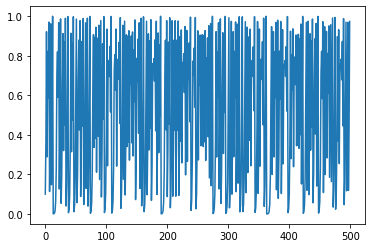

In [60]:
logistic_data = compute_fn(mu = 4, x0 = 0.1, length = 500)

plt.plot(logistic_data);

# Generate bifurcation diagram

In [86]:
mu_list = np.arange(2.5, 4, 0.01)
bifurcation = []


for mu in mu_list:
    clear_output()
    
    logistic_data = compute_fn(mu = mu, length = 500)
    
    # Compute bifurcations
    population = logistic_data[-1]
    
    
    # Compute FLE
    FLE = calc_lyapunov_exponent(logistic_data, plot_fit= True)

    bifurcation.append([mu,population,FLE])
        
bifurcation = pd.DataFrame(bifurcation,columns = ['mu','x','FLE'])

bifurcation.to_csv('FLEs_logistic.csv')

computing for  3.9899999999999682


(-0.5, 1.5)

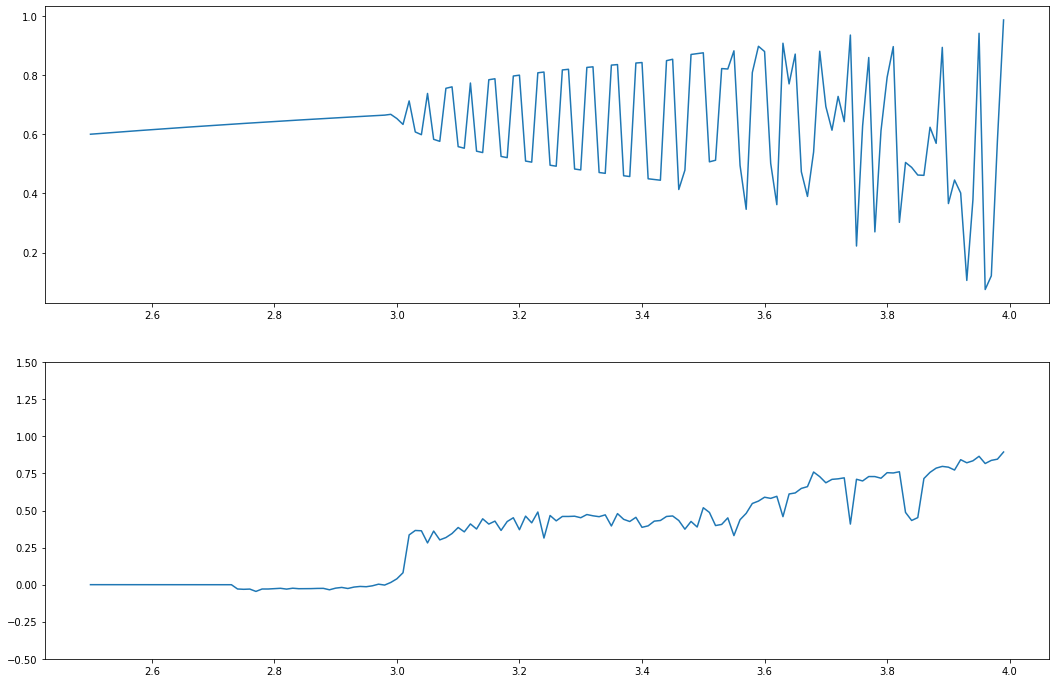

In [90]:
fig, axs = plt.subplots(2, figsize = [18,12])

axs[0].plot(bifurcation['mu'], bifurcation['x'])
# axs[0].set_ylim(0,1)
# axs[0].set_xlim(2.5)


axs[1].plot(bifurcation['mu'], bifurcation['FLE'])
axs[1].set_ylim(-0.5,1.5)
# axs[1].set_xlim(2.5)

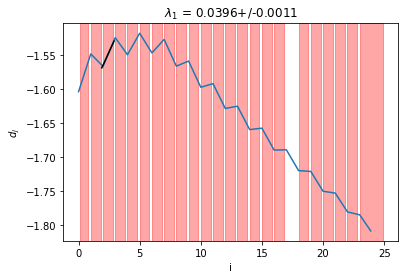

In [91]:

bifurcation = []


for mu in [3]:
    clear_output()
    
    logistic_data = compute_fn(mu = mu, length = 500)
    
    # Compute bifurcations
    population = logistic_data[-1]
    
    
    # Compute FLE
    FLE = calc_lyapunov_exponent(logistic_data, plot_fit= True)

    bifurcation.append([mu,population,FLE])
    
bifurcation = pd.DataFrame(bifurcation,columns = ['mu','x','FLE'])

In [66]:
bifurcation

,mu,x,FLE
0,2.00,9.046257e-25,0.693147
1,2.01,3.131975e-24,0.698135
2,2.02,1.077683e-23,0.703098
3,2.03,3.685644e-23,0.708036
4,2.04,1.252886e-22,0.712950
5,2.05,4.233615e-22,0.717840
6,2.06,1.422125e-21,0.722706
7,2.07,4.749151e-21,0.727549
8,2.08,1.576777e-20,0.732368
9,2.09,5.205054e-20,0.737164


# 20 Feb meeting

### Presentation 1 feedback
- Eigenvectors and eigenvalues (?)
- Meet before final presentation
- Final presentation - more an extension of what we've already done than a rewrite 
- Focus away from complexity and more on the dynamical system 
- Taken's theorum - explain lagging/phase space transform 
- Next presentation - give recap, but keep up momentum
- Dick James to read final report

### Lyapunov
- Use hourly data rather than daily - costs money, cry about how we're students and see if they give it us for free
- "Certain russian website" with hourly or minutely data - look for American company names 
- "hiroki sayama - introduction to modelling and analysis of complex systems" free textbook to "borrow/steal/cite"
- Print off and sign NDA 
- Ask James Ratcliffe about Comp A
- Simon Crampin's material might give a hint 
- Will and Conor's reports are the best 
- Contact Will Bewley 
- Weight data to remove perturbations???
- Last year's group said hourly works better 
- Consider hourly as well as daily??
- Compare lyapunov for 2 days vs lyapunov for 48 hours of data - Do the answers agree?


In [22]:
plot_acf(x['Open'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Test Lyapunov_funcs.py 

In [9]:
test_period = ly.calc_mean_period(logistic_data)

In [10]:
test_M = ly.gen_phase_space_matrix(logistic_data, J=1, m=2)

In [11]:
test_NN = ly.compute_nearest_neighbours(test_M,test_period)

In [13]:
test_div_data = pd.DataFrame(ly.expected_log_distance(test_M, test_NN), columns = ['i','log(dj)'])

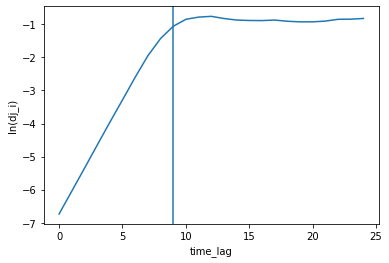

In [14]:
time_lag = 1

plt.plot(test_div_data['i'], test_div_data['log(dj)'])
plt.xlabel('time_lag')
plt.ylabel('ln(dj_i)')

linearEnd = 9
plt.axvline(linearEnd) # reference line for estimating the end of linear section

plt.show()